In [1]:
!ls /Users/quartz/GoogleDrive/ewp/

01_01_boiler_7days_20190104.csv
01_01_boiler_7days_20190104.pkl
01_02_data_coal_7days_20190104.csv
01_data-7days_20190104.xlsx
02_sampledata_solar.csv
02_sampledata_solar.xlsx
02_sampledata_solar_02.xlsx
02_sampledata_solar_revise.xlsx
02_sampledata_weather.xlsx
02_sampledata_weather_hour.csv
02_sampledata_weather_minute.csv
02_sampledata_weather_minute.xlsx
03_01_7days_boiler condition_20190104.xlsx
03_02_7days_shootbrowing_20190104.xlsx
03_03_7days_coal_20190104.xlsx
data_solar_01.pkl
data_solar_02.pkl
data_solar_03.pkl
data_weather_01.pkl
data_weather_02.pkl
data_weather_hour_01.pkl
data_weather_minute_01.pkl
data_whole_01.pkl
forecast_sample
img
img.png


In [3]:
file_solar = "/Users/quartz/GoogleDrive/ewp/02_sampledata_solar.xlsx"
file_weather = "/Users/quartz/GoogleDrive/ewp/02_sampledata_weather.xlsx"

# SETUP

In [82]:
import pandas as pd
from matplotlib import rcParams

%matplotlib inline
rcParams['font.family'] = 'DejaVu Sans'

---

### solar dataset 전처리

In [5]:
data_raw = pd.read_excel(file_solar, header=0)
data_raw.tail()

,1,2,3,4,5,6,7,8,9,10,...,73,74,75,76,77,78,79,80,81,82
03-06 22:45:00,0,0.0976597,-1.14883,0,1.86405,0,0,336.168,335.502,333.164,...,0,0,0,0,0,0,0,0,0,0
03-06 23:00:00,0,0.415459,-1.19787,0,1.89844,0,0,334.375,332.186,333.786,...,0,0,0,0,0,0,0,0,0,0
03-06 23:15:00,0,0.5,-1.30126,0,1.97502,0,0,334.817,333.619,331.076,...,0,0,0,0,0,0,0,0,0,0
03-06 23:30:00,0,0.436797,-1.37634,0,2.03704,0,0,334.834,333.632,331.393,...,0,0,0,0,0,0,0,0,0,0
03-06 23:45:00,0,0.349566,-1.35102,0,2.24216,0,0,334.656,332.998,332.503,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_raw.index

Index([               nan,             'TIME',                nan,
       ' 03-01  00:00:00', ' 03-01  00:15:00', ' 03-01  00:30:00',
       ' 03-01  00:45:00', ' 03-01  01:00:00', ' 03-01  01:15:00',
       ' 03-01  01:30:00',
       ...
       ' 03-06  21:30:00', ' 03-06  21:45:00', ' 03-06  22:00:00',
       ' 03-06  22:15:00', ' 03-06  22:30:00', ' 03-06  22:45:00',
       ' 03-06  23:00:00', ' 03-06  23:15:00', ' 03-06  23:30:00',
       ' 03-06  23:45:00'],
      dtype='object', length=579)

### data description 데이터프레임 만들기

In [183]:
# data description

data_description = data_raw.iloc[:3, :]
data_description = data_description.T
data_description.columns = ['note', 'feature', 'measure']
data_description.head()

,note,feature,measure
1,공통,일사량,[W/m2]
2,공통,외기온도,[℃]
3,공통,모듈온도,[℃]
4,공통,총 전력(AC),[kW]
5,인버터 1,DC전압,[V]


### data_raw 전처리

In [184]:
# make new columns

new_columns = list(data_description.columns)
new_columns_add = list(data_raw.T.columns[3:])
new_columns.extend(new_columns_add)

data_raw = data_raw.T
data_raw.columns = new_columns

# make "feature_revise" with note, feature
data_raw.insert(0, 'feature_revise', data_raw.note + "_" + data_raw.feature)

# drop note, feature, measure
data_raw.drop(['note', 'feature', 'measure'], axis=1, inplace=True)

# transpose again
data_raw = data_raw.T

# change columns with first row
data_raw.columns = data_raw.iloc[:1, :].values[0]

# drop "feature revise" row
data_raw.drop('feature_revise', axis=0, inplace=True)
data_raw.tail()

,공통_일사량,공통_외기온도,공통_모듈온도,공통_총 전력(AC),인버터 1_DC전압,인버터 1_DC전류,인버터 1_DC전력,인버터 1_R상 전압,인버터 1_S상 전압,인버터 1_T상 전압,...,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류
03-06 22:45:00,0,0.0976597,-1.14883,0,1.86405,0,0,336.168,335.502,333.164,...,0,0,0,0,0,0,0,0,0,0
03-06 23:00:00,0,0.415459,-1.19787,0,1.89844,0,0,334.375,332.186,333.786,...,0,0,0,0,0,0,0,0,0,0
03-06 23:15:00,0,0.5,-1.30126,0,1.97502,0,0,334.817,333.619,331.076,...,0,0,0,0,0,0,0,0,0,0
03-06 23:30:00,0,0.436797,-1.37634,0,2.03704,0,0,334.834,333.632,331.393,...,0,0,0,0,0,0,0,0,0,0
03-06 23:45:00,0,0.349566,-1.35102,0,2.24216,0,0,334.656,332.998,332.503,...,0,0,0,0,0,0,0,0,0,0


In [185]:
data_raw.to_pickle('/Users/quartz/GoogleDrive/ewp/data_solar_01.pkl')

### 2

In [198]:
file_solar = '/Users/quartz/GoogleDrive/ewp/data_solar_01.pkl'
data_solar = pd.read_pickle(file_solar)
data_solar.reset_index(inplace=True)
data_solar = data_solar.rename(columns={'index':'일시'})

data_revise = data_solar.iloc[:, 1:].astype('float32')
data_revise.insert(0, '일시', data_solar['일시'].values)

# add year
data_revise = data_revise.rename(columns={'시간':'일시'})
data_revise['일시'] = data_revise['일시'].apply(lambda x : x.strip())
data_revise['연도'] = '2018-'
data_revise['일시'] = data_revise['연도'] + data_revise['일시']

# drop 연도
data_revise.drop('연도', axis=1, inplace=True)

# reset_index
data_revise.index = data_revise['일시']
data_revise.drop('일시', axis=1, inplace=True)
data_revise.tail()

,공통_일사량,공통_외기온도,공통_모듈온도,공통_총 전력(AC),인버터 1_DC전압,인버터 1_DC전류,인버터 1_DC전력,인버터 1_R상 전압,인버터 1_S상 전압,인버터 1_T상 전압,...,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류,인버터 2_전압,인버터 2_전류
일시,,,,,,,,,,,,,,,,,,,,,
2018-03-06 22:45:00,0.0,0.097660,-1.148832,0.0,1.864047,0.0,0.0,336.167694,335.501587,333.164154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-06 23:00:00,0.0,0.415459,-1.197866,0.0,1.898438,0.0,0.0,334.374817,332.185822,333.785797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-06 23:15:00,0.0,0.500000,-1.301261,0.0,1.975021,0.0,0.0,334.816772,333.619110,331.076355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-06 23:30:00,0.0,0.436797,-1.376343,0.0,2.037036,0.0,0.0,334.834351,333.632111,331.393463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-06 23:45:00,0.0,0.349566,-1.351015,0.0,2.242163,0.0,0.0,334.655579,332.998169,332.502502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 전처리 - 인버터 별 전압, 전류 하나로 묶기

In [200]:
# 인버터 별 전압을 하나로 묶는 작업은 왜 필요한가? 인버터 1, 2의 전압, 전류의 상관관계가 거의 비슷. 다중공선성이 발생할 확률이 매우 높다.

print(data_revise['인버터 1_전압'].corr().mean().mean(), data_revise['인버터 1_전류'].corr().mean().mean(), data_revise['인버터 2_전압'].corr().mean().mean(), data_revise['인버터 2_전압'].corr().mean().mean())
print("\n")
print(data_revise.columns) # 시간 1, 공통 4, 인버터1 10+2, 인버터2 10+2

0.9990907125848812 0.9915882946256991 0.9993638885352684 0.9993638885352684


Index(['공통_일사량', '공통_외기온도', '공통_모듈온도', '공통_총 전력(AC)', '인버터 1_DC전압',
       '인버터 1_DC전류', '인버터 1_DC전력', '인버터 1_R상 전압', '인버터 1_S상 전압', '인버터 1_T상 전압',
       '인버터 1_R상 전류', '인버터 1_S상 전류', '인버터 1_T상 전류', '인버터 1_AC전력', '인버터 1_전압',
       '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압',
       '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압',
       '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압',
       '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압',
       '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압', '인버터 1_전류', '인버터 1_전압',
       '인버터 1_전류', '인버터 2_DC전압', '인버터 2_DC전류', '인버터 2_DC전력', '인버터 2_R상 전압',
       '인버터 2_S상 전압', '인버터 2_T상 전압', '인버터 2_R상 전류', '인버터 2_S상 전류',
       '인버터 2_T상 전류', '인버터 2_AC전력', '인버터 2_전압', '인버터 2_전류', '인버터 2_전압',
       '인버터 2_전류', '인버터 2_전압', '인버터 2_전류', '인버터 2_전압', '인버터 2_전류', '인버터 2_전압',
       

In [201]:
# 세로 축으로 평균값 구하기
data_revise['인버터 1_전압(종합)'] = data_revise['인버터 1_전압'].mean(axis=1)
data_revise['인버터 1_전류(종합)'] = data_revise['인버터 1_전류'].mean(axis=1)

data_revise['인버터 2_전압(종합)'] = data_revise['인버터 2_전압'].mean(axis=1)
data_revise['인버터 2_전류(종합)'] = data_revise['인버터 2_전류'].mean(axis=1)

# drop 인버터 1_전압, 전류 / 인버터 2_전압, 전류
data_revise.drop(['인버터 1_전압', '인버터 1_전류', '인버터 2_전압', '인버터 2_전류'], axis=1, inplace=True)
data_revise.tail()

,공통_일사량,공통_외기온도,공통_모듈온도,공통_총 전력(AC),인버터 1_DC전압,인버터 1_DC전류,인버터 1_DC전력,인버터 1_R상 전압,인버터 1_S상 전압,인버터 1_T상 전압,...,인버터 2_S상 전압,인버터 2_T상 전압,인버터 2_R상 전류,인버터 2_S상 전류,인버터 2_T상 전류,인버터 2_AC전력,인버터 1_전압(종합),인버터 1_전류(종합),인버터 2_전압(종합),인버터 2_전류(종합)
일시,,,,,,,,,,,,,,,,,,,,,
2018-03-06 22:45:00,0.0,0.097660,-1.148832,0.0,1.864047,0.0,0.0,336.167694,335.501587,333.164154,...,337.089661,334.233612,0.0,0.0,0.0,0.0,0.571005,0.0,0.0,0.0
2018-03-06 23:00:00,0.0,0.415459,-1.197866,0.0,1.898438,0.0,0.0,334.374817,332.185822,333.785797,...,335.673462,332.830109,0.0,0.0,0.0,0.0,0.575366,0.0,0.0,0.0
2018-03-06 23:15:00,0.0,0.500000,-1.301261,0.0,1.975021,0.0,0.0,334.816772,333.619110,331.076355,...,335.294403,332.397217,0.0,0.0,0.0,0.0,0.584560,0.0,0.0,0.0
2018-03-06 23:30:00,0.0,0.436797,-1.376343,0.0,2.037036,0.0,0.0,334.834351,333.632111,331.393463,...,335.204559,332.317261,0.0,0.0,0.0,0.0,0.609948,0.0,0.0,0.0
2018-03-06 23:45:00,0.0,0.349566,-1.351015,0.0,2.242163,0.0,0.0,334.655579,332.998169,332.502502,...,335.389648,332.589630,0.0,0.0,0.0,0.0,0.617531,0.0,0.0,0.0


In [202]:
data_revise.to_pickle('/Users/quartz/GoogleDrive/ewp/data_solar_03.pkl')

(576, 28)

### Weather dataset 전처리

In [78]:
data_raw_hour = pd.read_excel(file_weather, sheet_name='1시간 단위 Data')
data_raw_minute = pd.read_excel(file_weather, sheet_name='1분 단위 Data')

In [81]:
data_raw_hour.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위)
0,129,03-01 00:00:00,3.1,0.5,3.6,340,96,1001.3,NaN,NaN,NaN,NaN
1,129,03-01 01:00:00,2.8,NaN,0.7,140,97,1001.9,NaN,NaN,NaN,NaN
2,129,03-01 02:00:00,2.6,NaN,3.2,320,95,1002.6,NaN,NaN,NaN,NaN
3,129,03-01 03:00:00,2.0,NaN,1.9,230,97,1002.8,NaN,NaN,NaN,NaN
4,129,03-01 04:00:00,2.2,NaN,2.1,180,97,1003.0,NaN,NaN,NaN,NaN


In [82]:
data_raw_minute.head()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,129,03-01 00:01:00,3.0,0.0,345.3,3.2,1001.4,1005.0,95.6,0.0,0
1,129,03-01 00:02:00,3.0,0.0,334.2,3.8,1001.4,1005.0,95.7,0.0,0
2,129,03-01 00:03:00,3.0,0.0,329.3,4.6,1001.3,1004.9,95.8,0.0,0
3,129,03-01 00:04:00,3.0,0.0,319.9,4.6,1001.4,1005.0,95.8,0.0,0
4,129,03-01 00:05:00,3.0,0.0,331.1,3.9,1001.4,1005.0,95.9,0.0,0


In [87]:
data_raw_hour.to_pickle('/Users/quartz/GoogleDrive/ewp/data_weather_hour_01.pkl')
data_raw_minute.to_pickle('/Users/quartz/GoogleDrive/ewp/data_weather_minute_01.pkl')

---

In [169]:
data_raw_minute = pd.read_pickle('/Users/quartz/GoogleDrive/ewp/data_weather_minute_01.pkl')

data_raw_minute['일시'] = data_raw_minute['일시'].apply(lambda x : x.strip())
data_raw_minute['연도'] = '2018-'
data_raw_minute['일시'] = data_raw_minute['연도'] + data_raw_minute['일시']

# drop 연도, 지점
data_raw_minute.drop(['연도', '지점'], axis=1, inplace=True)

# change dtypes
print(data_raw_minute.dtypes)
data_raw_minute['일시'] = pd.to_datetime(data_raw_minute['일시'], format='%Y-%m-%d %H:%M:%S', infer_datetime_format=True)
print(data_raw_minute.dtypes)

일시             object
기온(°C)        float64
누적강수량(mm)     float64
풍향(deg)       float64
풍속(m/s)       float64
현지기압(hPa)     float64
해면기압(hPa)     float64
습도(%)         float64
일사(MJ/m^2)    float64
일조(Sec)         int64
dtype: object
일시            datetime64[ns]
기온(°C)               float64
누적강수량(mm)            float64
풍향(deg)              float64
풍속(m/s)              float64
현지기압(hPa)            float64
해면기압(hPa)            float64
습도(%)                float64
일사(MJ/m^2)           float64
일조(Sec)                int64
dtype: object


In [205]:
data_raw_minute.index = data_raw_minute['일시']
data_raw_minute.drop('일시', axis=1, inplace=True)

# make new dataframe
data_weather = data_raw_minute.resample('15min').sum()

# make pkl file
data_weather.to_pickle('/Users/quartz/GoogleDrive/ewp/data_weather_02.pkl')

### 노트

- 발전량에 따른 셀(패널) 당 가중치를 부여
- 설비 요인(인자)를 일사량 -> 총 전력 간 노이즈를 예측하는 인자로 활용
    1. 날씨 데이터 -> 일사량
    2. 일사량, 설비 데이터 -> 총 전력

In [208]:
data_solar.iloc[:, 1:].corr()

""


### data_solar, data_weather 통합

In [16]:
file_solar = '/Users/quartz/GoogleDrive/ewp/data_solar_03.pkl'
file_weather = '/Users/quartz/GoogleDrive/ewp/data_weather_02.pkl'

In [17]:
data_solar = pd.read_pickle(file_solar)
data_solar.reset_index(inplace=True, drop=True)
data_solar.tail()

,공통_일사량,공통_외기온도,공통_모듈온도,공통_총 전력(AC),인버터 1_DC전압,인버터 1_DC전류,인버터 1_DC전력,인버터 1_R상 전압,인버터 1_S상 전압,인버터 1_T상 전압,...,인버터 2_S상 전압,인버터 2_T상 전압,인버터 2_R상 전류,인버터 2_S상 전류,인버터 2_T상 전류,인버터 2_AC전력,인버터 1_전압(종합),인버터 1_전류(종합),인버터 2_전압(종합),인버터 2_전류(종합)
571,0.0,0.097660,-1.148832,0.0,1.864047,0.0,0.0,336.167694,335.501587,333.164154,...,337.089661,334.233612,0.0,0.0,0.0,0.0,0.571005,0.0,0.0,0.0
572,0.0,0.415459,-1.197866,0.0,1.898438,0.0,0.0,334.374817,332.185822,333.785797,...,335.673462,332.830109,0.0,0.0,0.0,0.0,0.575366,0.0,0.0,0.0
573,0.0,0.500000,-1.301261,0.0,1.975021,0.0,0.0,334.816772,333.619110,331.076355,...,335.294403,332.397217,0.0,0.0,0.0,0.0,0.584560,0.0,0.0,0.0
574,0.0,0.436797,-1.376343,0.0,2.037036,0.0,0.0,334.834351,333.632111,331.393463,...,335.204559,332.317261,0.0,0.0,0.0,0.0,0.609948,0.0,0.0,0.0
575,0.0,0.349566,-1.351015,0.0,2.242163,0.0,0.0,334.655579,332.998169,332.502502,...,335.389648,332.589630,0.0,0.0,0.0,0.0,0.617531,0.0,0.0,0.0


In [12]:
data_weather = pd.read_pickle(file_weather)
data_weather.reset_index(inplace=True)
data_weather.tail()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
571,2018-03-06 22:45:00,19.3,0.0,812.1,34.6,15404.7,15460.2,995.6,298.95,571500
572,2018-03-06 23:00:00,18.0,0.0,763.0,27.2,15405.0,15460.5,997.9,298.95,571500
573,2018-03-06 23:15:00,16.0,0.0,920.3,28.2,15404.6,15460.1,1015.4,298.95,571500
574,2018-03-06 23:30:00,17.3,0.0,810.6,29.4,15405.0,15460.5,1016.9,298.95,571500
575,2018-03-06 23:45:00,17.8,0.0,792.0,29.0,15405.0,15460.5,1021.6,298.95,571500


In [14]:
data_concat = pd.concat([data_weather, data_solar], axis=1)
data_concat.tail()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec),...,인버터 2_S상 전압,인버터 2_T상 전압,인버터 2_R상 전류,인버터 2_S상 전류,인버터 2_T상 전류,인버터 2_AC전력,인버터 1_전압(종합),인버터 1_전류(종합),인버터 2_전압(종합),인버터 2_전류(종합)
571,2018-03-06 22:45:00,19.3,0.0,812.1,34.6,15404.7,15460.2,995.6,298.95,571500,...,337.089661,334.233612,0.0,0.0,0.0,0.0,0.571005,0.0,0.0,0.0
572,2018-03-06 23:00:00,18.0,0.0,763.0,27.2,15405.0,15460.5,997.9,298.95,571500,...,335.673462,332.830109,0.0,0.0,0.0,0.0,0.575366,0.0,0.0,0.0
573,2018-03-06 23:15:00,16.0,0.0,920.3,28.2,15404.6,15460.1,1015.4,298.95,571500,...,335.294403,332.397217,0.0,0.0,0.0,0.0,0.584560,0.0,0.0,0.0
574,2018-03-06 23:30:00,17.3,0.0,810.6,29.4,15405.0,15460.5,1016.9,298.95,571500,...,335.204559,332.317261,0.0,0.0,0.0,0.0,0.609948,0.0,0.0,0.0
575,2018-03-06 23:45:00,17.8,0.0,792.0,29.0,15405.0,15460.5,1021.6,298.95,571500,...,335.389648,332.589630,0.0,0.0,0.0,0.0,0.617531,0.0,0.0,0.0


In [18]:
data_concat.to_pickle('/Users/quartz/GoogleDrive/ewp/data_whole_01.pkl')

---

### 노트

- 분석 목적

```
1. 기상실측데이터 일사량 예측 모델의 성능 파악
2. 기상실측데이터 일사량 예측 모델에 기상예보데이터를 입력(input)했을 때, 어떤 결과(output)가 나오는지 파악
```

- 기상실측데이터 변수 : ```기온 / 누적강수량 / 풍향 / 풍속 / 현지기압 / 해면기압 / 습도 ```
- 기상예보데이터 변수 : ```3시간기온 / 일최고기온 / 일최저기온 / 하늘상태 / 강수형태 / 강수확률 / 6시간 강수량 / 6시간 적설 / 습도 / 파고 / 풍속 / 풍향 ```

> 기온, 강수량, 풍향, 풍속, 습도만 사용 가능

### 기상예보 데이터 샘플 만들기

In [10]:
file_1 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/01_temperature_3H.csv'
file_2 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/02_temperature_max.csv'
file_3 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/03_temperature_min.csv'
file_4 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/04_sky.csv'
file_5 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/05_precipitation_form.csv'
file_6 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/06_rainfall_probability.csv'
file_7 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/07_rainfall_6H.csv'
file_8 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/08_snow_6H.csv'
file_9 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/09_humidity.csv'
file_10 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/10_wind_speed.csv'
file_11 = '/Users/quartz/GoogleDrive/ewp/forecast_sample/11_wind_direction.csv'

In [52]:
data_1 = pd.read_csv(file_1)
data_2 = pd.read_csv(file_2)
data_3 = pd.read_csv(file_3)
data_4 = pd.read_csv(file_4)
data_5 = pd.read_csv(file_5)
data_6 = pd.read_csv(file_6)
data_7 = pd.read_csv(file_7)
data_8 = pd.read_csv(file_8)
data_9 = pd.read_csv(file_9)
data_10 = pd.read_csv(file_10)
data_11 = pd.read_csv(file_11)

In [12]:
# print(data_1.columns)
# print(data_2.columns)
# print(data_3.columns)
# print(data_4.columns)
# print(data_5.columns)
# print(data_6.columns)
# print(data_7.columns)
# print(data_8.columns)
# print(data_9.columns)
# print(data_10.columns)
# print(data_11.columns)

In [69]:
data_1.isna().sum()

 format: day                                0
hour                                        2
forecast                                    2
value  location:53_114 Start : 20180201     2
dtype: int64

In [67]:
data_1[' format: day'].value_counts().sort_values(ascending=True)[:5].index

Index([' Start : 20180401 ', ' Start : 20180301 ', ' 31', ' 29', ' 30'], dtype='object')

In [68]:
data_1[data_1[' format: day'] == ' Start : 20180401 ']

,format: day,hour,forecast,value location:53_114 Start : 20180201
8733,Start : 20180401,NaN,NaN,NaN


In [13]:
# 데이터셋 별 shape와 최대 예측 기간 확인

for n, data in enumerate([data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11], start=1):

    max_standard = np.max(data.forecast.value_counts())
    data_test = data.forecast.value_counts().sort_index()

    max_forecast = data_test[data_test.values == max_standard].index[-1]
    
    print("data_{} | shape : {}, max forecast(H) : {} \n".format(n, data.shape, max_forecast))

data_1 | shape : (13174, 4), max forecast(H) : 46.0 

data_2 | shape : (1693, 4), max forecast(H) : 7.0 

data_3 | shape : (1426, 4), max forecast(H) : 7.0 

data_4 | shape : (4144, 4), max forecast(H) : 46 

data_5 | shape : (13174, 4), max forecast(H) : 46.0 

data_6 | shape : (13174, 4), max forecast(H) : 46.0 

data_7 | shape : (6766, 4), max forecast(H) : 25.0 

data_8 | shape : (6766, 4), max forecast(H) : 25.0 

data_9 | shape : (13174, 4), max forecast(H) : 46.0 

data_10 | shape : (13174, 4), max forecast(H) : 46.0 

data_11 | shape : (13174, 4), max forecast(H) : 46.0 



### 노트

1. data 2, 3, 7, 8은 통합하기 어려움
    - 2: 일최고기온
    - 3: 일최저기온
    - 7: 강수량 6H
    - 8: 적설 6H
2. data 5 - 하늘상태 데이터셋은 2월 한달치만 존재함
3. data 1, 5, 6, 9, 10, 11만 통합 가능
    - 1 : 3시간 기온
    - 5 : 강수형태
    - 6 : 강수확률
    - 9 : 습도
    - 10 : 풍속
    - 11 : 풍향

In [15]:
data_concat = pd.concat([data_1, data_5, data_6, data_9, data_10, data_11], axis=1)
data_concat.tail()

,format: day,hour,forecast,value location:53_114 Start : 20180201,format: day,hour,forecast,value location:53_114 Start : 20180201,format: day,hour,...,forecast,value location:53_114 Start : 20180201,format: day,hour,forecast,value location:53_114 Start : 20180201,format: day,hour,forecast,value location:53_114 Start : 20180201
13169,30,2300.0,52.0,14.0,30,2300.0,52.0,0.0,30,2300.0,...,52.0,60.0,30,2300.0,52.0,3.7,30,2300.0,52.0,272.0
13170,30,2300.0,55.0,14.0,30,2300.0,55.0,0.0,30,2300.0,...,55.0,70.0,30,2300.0,55.0,6.1,30,2300.0,55.0,280.0
13171,30,2300.0,58.0,12.0,30,2300.0,58.0,0.0,30,2300.0,...,58.0,75.0,30,2300.0,58.0,5.2,30,2300.0,58.0,289.0
13172,30,2300.0,61.0,11.0,30,2300.0,61.0,0.0,30,2300.0,...,61.0,75.0,30,2300.0,61.0,5.7,30,2300.0,61.0,289.0
13173,30,2300.0,64.0,10.0,30,2300.0,64.0,0.0,30,2300.0,...,64.0,65.0,30,2300.0,64.0,4.4,30,2300.0,64.0,284.0


### 노트
-기상예보데이터 구축

    1.필요한 데이터는 3/1 오전 0시부터 3/7 오전 0시까지의 기상예보데이터.
    2.위 데이터를 확보할 수 있는 가장 빠른 시간은 46시간 전. 이때는 2/27일 오전 2시부터 3/5일 오전 2시.


> 2, 3월 데이터 나누기 (6587)

> columns 정리, 추출

> 해당 구간 샘플만 추출

In [23]:
data_concat.columns

Index([' format: day', 'hour', 'forecast',
       'value  location:53_114 Start : 20180201 ', ' format: day', 'hour',
       'forecast', 'value  location:53_114 Start : 20180201 ', ' format: day',
       'hour', 'forecast', 'value  location:53_114 Start : 20180201 ',
       ' format: day', 'hour', 'forecast',
       'value  location:53_114 Start : 20180201 ', ' format: day', 'hour',
       'forecast', 'value  location:53_114 Start : 20180201 ', ' format: day',
       'hour', 'forecast', 'value  location:53_114 Start : 20180201 '],
      dtype='object')

In [77]:
data_concat.dropna(inplace=True)
data_concat[' format: day'] = data_concat[' format: day'].astype('float64')

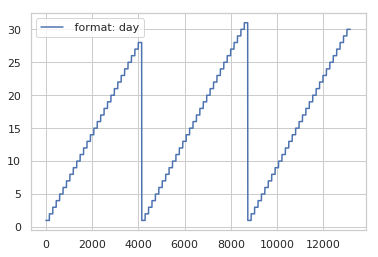

In [86]:
data_concat.iloc[:, :1].plot()
# 3개월 데이터 확보

    - 1 : 3시간 기온
    - 5 : 강수형태
    - 6 : 강수확률
    - 9 : 습도
    - 10 : 풍속
    - 11 : 풍향

In [127]:
# choose columns (day, hour, forecast)
data_concat['day_'] = data_concat.iloc[:, :1].values
data_concat['hour_'] = data_concat.iloc[:, 1:2].values
data_concat['forecast_'] = data_concat.iloc[:, 2:3].values
data_concat.drop([' format: day', 'hour', 'forecast'], axis=1, inplace=True)

data_concat.columns = ['temperature_3H', 'precipitation_form', 'rainfall_probability', 'humidity', 'wind_speed', 'wind_direction', 'day', 'hour', 'forecast']
data_concat.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,day,hour,forecast
13169,14.0,0.0,20.0,60.0,3.7,272.0,30.0,2300.0,52.0
13170,14.0,0.0,20.0,70.0,6.1,280.0,30.0,2300.0,55.0
13171,12.0,0.0,20.0,75.0,5.2,289.0,30.0,2300.0,58.0
13172,11.0,0.0,20.0,75.0,5.7,289.0,30.0,2300.0,61.0
13173,10.0,0.0,10.0,65.0,4.4,284.0,30.0,2300.0,64.0


In [193]:
# make feb, march
data_feb = data_concat.iloc[:4144, :]
data_mar = data_concat.iloc[4144:5000, :]

# make feb 26~28, mar 1 ~ 5
data_up = data_feb[(data_feb.day == 26) | (data_feb.day == 27) | (data_feb.day == 28)]
data_down = data_mar[(data_mar.day == 1) | (data_mar.day == 2) | (data_mar.day == 3) | (data_mar.day == 4) | (data_mar.day == 5)]

data_concat_v2 = pd.concat([data_up, data_down])
data_concat_v2.reset_index(drop=True, inplace=True)
data_concat_v2.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,day,hour,forecast
1179,2.0,1.0,70.0,95.0,5.9,9.0,5.0,2300.0,52.0
1180,3.0,1.0,70.0,90.0,4.7,353.0,5.0,2300.0,55.0
1181,4.0,0.0,30.0,85.0,4.5,344.0,5.0,2300.0,58.0
1182,3.0,0.0,30.0,85.0,4.2,341.0,5.0,2300.0,61.0
1183,2.0,0.0,30.0,85.0,4.3,355.0,5.0,2300.0,64.0


In [195]:
# data_concat_3
data_concat_v3 = data_concat_v2[data_concat_v2.forecast == 46.0]
data_concat_v3.reset_index(drop=True, inplace=True)
data_concat_v3.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,day,hour,forecast
59,7.0,0.0,20.0,65.0,3.1,68.0,5.0,1100.0,46.0
60,5.0,0.0,20.0,75.0,3.1,69.0,5.0,1400.0,46.0
61,4.0,0.0,30.0,80.0,1.9,74.0,5.0,1700.0,46.0
62,2.0,1.0,60.0,95.0,1.9,43.0,5.0,2000.0,46.0
63,2.0,1.0,60.0,95.0,3.4,19.0,5.0,2300.0,46.0


In [196]:
# data_concat_4

# reset index
data_concat_v3.index = range(0, 192, 3)

# make dummy
data_dummy = pd.DataFrame(columns=['dummy'], index=range(0, 189, 1))

# concat
data_concat_v4 = pd.concat([data_dummy, data_concat_v3], axis=1)

# drop
data_concat_v4.drop(['dummy'], axis=1, inplace=True)
data_concat_v4.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction,day,hour,forecast
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,2.0,1.0,60.0,95.0,1.9,43.0,5.0,2000.0,46.0
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2.0,1.0,60.0,95.0,3.4,19.0,5.0,2300.0,46.0


In [214]:
# data_concat_v5 : interpolate, get specific time(2/27 02:00:00 ~ 3/5 02:00:00 -> 3/1 00:00:00 ~ 3/7 00:00:00)

data_concat_v5 = data_concat_v4.interpolate()
data_concat_v5 = data_concat_v5.iloc[24:169, :]
data_concat_v5.index = pd.date_range('2018-03-01', periods=145, freq='H')
data_concat_v5.drop(['day', 'hour', 'forecast'], axis=1, inplace=True)
data_concat_v5.tail()

,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction
2018-03-06 20:00:00,1.000000,0.0,16.666667,83.333333,2.900000,118.0
2018-03-06 21:00:00,1.000000,0.0,20.000000,85.000000,3.100000,119.0
2018-03-06 22:00:00,1.666667,0.0,20.000000,83.333333,3.133333,118.0
2018-03-06 23:00:00,2.333333,0.0,20.000000,81.666667,3.166667,117.0
2018-03-07 00:00:00,3.000000,0.0,20.000000,80.000000,3.200000,116.0


In [215]:
data_concat_v5.to_pickle('/Users/quartz/GoogleDrive/ewp/data_forecast_1H_01.pkl')

---

### 기상예보데이터, 발전량 데이터 통합

In [216]:
!ls /Users/quartz/GoogleDrive/ewp/

01_01_boiler_7days_20190104.csv
01_01_boiler_7days_20190104.pkl
01_02_data_coal_7days_20190104.csv
01_data-7days_20190104.xlsx
02_sampledata_solar.csv
02_sampledata_solar.xlsx
02_sampledata_solar_02.xlsx
02_sampledata_solar_revise.xlsx
02_sampledata_weather.xlsx
02_sampledata_weather_hour.csv
02_sampledata_weather_minute.csv
02_sampledata_weather_minute.xlsx
03_01_7days_boiler condition_20190104.xlsx
03_02_7days_shootbrowing_20190104.xlsx
03_03_7days_coal_20190104.xlsx
data_forecast_1H_01.pkl
data_solar_01.pkl
data_solar_02.pkl
data_solar_03.pkl
data_weather_01.pkl
data_weather_02.pkl
data_weather_hour_01.pkl
data_weather_minute_01.pkl
data_whole_01.pkl
forecast_sample
img
img.png


In [243]:
data_forecast = pd.read_pickle('/Users/quartz/GoogleDrive/ewp/data_forecast_1H_01.pkl')
data_solar = pd.read_pickle('/Users/quartz/GoogleDrive/ewp/data_solar_03.pkl')

# reset index
data_solar.reset_index(inplace=True)
print(data_forecast.shape, data_solar.shape)

# merge
data_solar['일시'] = pd.to_datetime(data_solar['일시'], format='%Y-%m-%d %H:%M:%S', infer_datetime_format=True)
data_solar.index = data_solar['일시']
data_solar.drop(['일시'], axis=1, inplace=True)
data_solar_v2 = data_solar.resample('1H').first()

(145, 6) (576, 29)


In [252]:
data_forecast_v2 = data_forecast.iloc[:-1, :]
print(data_forecast_v2.shape)
data_forecast_v2.tail()

(144, 6)


,temperature_3H,precipitation_form,rainfall_probability,humidity,wind_speed,wind_direction
2018-03-06 19:00:00,1.000000,0.0,13.333333,81.666667,2.700000,117.0
2018-03-06 20:00:00,1.000000,0.0,16.666667,83.333333,2.900000,118.0
2018-03-06 21:00:00,1.000000,0.0,20.000000,85.000000,3.100000,119.0
2018-03-06 22:00:00,1.666667,0.0,20.000000,83.333333,3.133333,118.0
2018-03-06 23:00:00,2.333333,0.0,20.000000,81.666667,3.166667,117.0


In [249]:
print(data_solar_v2.shape)
data_solar_v2.tail()

(144, 28)


,공통_일사량,공통_외기온도,공통_모듈온도,공통_총 전력(AC),인버터 1_DC전압,인버터 1_DC전류,인버터 1_DC전력,인버터 1_R상 전압,인버터 1_S상 전압,인버터 1_T상 전압,...,인버터 2_S상 전압,인버터 2_T상 전압,인버터 2_R상 전류,인버터 2_S상 전류,인버터 2_T상 전류,인버터 2_AC전력,인버터 1_전압(종합),인버터 1_전류(종합),인버터 2_전압(종합),인버터 2_전류(종합)
일시,,,,,,,,,,,,,,,,,,,,,
2018-03-06 19:00:00,0.0,0.827618,-0.861121,0.0,110.379036,0.0,0.0,336.165924,334.499176,332.239105,...,335.416534,333.218384,0.0,0.0,0.0,0.0,137.232361,0.0,122.683121,0.0
2018-03-06 20:00:00,0.0,0.255331,-1.587886,0.0,1.593750,0.0,0.0,334.536926,333.856598,331.677612,...,335.378723,332.619659,0.0,0.0,0.0,0.0,0.445005,0.0,0.000000,0.0
2018-03-06 21:00:00,0.0,0.468113,-1.306258,0.0,1.536532,0.0,0.0,334.947021,333.822113,331.613708,...,335.694366,332.799805,0.0,0.0,0.0,0.0,0.446993,0.0,0.000000,0.0
2018-03-06 22:00:00,0.0,0.392779,-0.738232,0.0,1.712730,0.0,0.0,336.167694,335.036163,332.873962,...,334.903961,335.549255,0.0,0.0,0.0,0.0,0.545759,0.0,0.000000,0.0
2018-03-06 23:00:00,0.0,0.415459,-1.197866,0.0,1.898438,0.0,0.0,334.374817,332.185822,333.785797,...,335.673462,332.830109,0.0,0.0,0.0,0.0,0.575366,0.0,0.000000,0.0


In [259]:
data_concat_v6 = pd.concat([data_forecast_v2, data_solar_v2], axis=1).iloc[:, :7]
data_concat_v6.columns = ['temperature_3H', 'precipitation_form', 'rainfall_probability', 'humidity', 'wind_speed', 'wind_direction', 'insolation']
data_concat_v6.to_pickle('/Users/quartz/GoogleDrive/ewp/data_whole_02.pkl')

In [260]:
data_concat_v6.columns

Index(['temperature_3H', 'precipitation_form', 'rainfall_probability',
       'humidity', 'wind_speed', 'wind_direction', 'insolation'],
      dtype='object')

### 노트

-해결해야 할 이슈는 크게 2가지. 
    1. 3시간 단위 데이터를 15분 단위 데이터에 맵핑
    2. 46시간 앞 예측 데이터만 추출할 것.
    3. 석문면 "하늘상태" 데이터가 부재한 상황
    
> 3시간 - 15분 단위 매핑은 3시간은 보간법으로 1시간으로, 15분은 1시간 단위 데이터 추출으로 보정

> 46시간 앞 데이터만 모아서 반영할 것 

> 하늘 상태 데이터 배제하고 진행